In [5]:
import ctypes
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

%matplotlib notebook

class trackingData(ctypes.Structure):
    _fields_ = [('transmitterCount', ctypes.c_int),
                ('pointCount', ctypes.c_int),
                ('transmitterX', ctypes.POINTER(ctypes.c_double)),
                ('transmitterY', ctypes.POINTER(ctypes.c_double)),
                ('pointX', ctypes.POINTER(ctypes.c_double)),
                ('pointY', ctypes.POINTER(ctypes.c_double))]

mydll = ctypes.cdll.LoadLibrary(r"D:\\projects\\github\\IndoorPositioning\\x64\\Debug\\modPythonData.dll")

testFunc = mydll.importPythonData
mydll.importPythonData.restype = ctypes.POINTER(trackingData)
mydll.importPythonData.argtypes = [] 

result = testFunc()

array_pointer1 = ctypes.cast(result.contents.transmitterX, ctypes.POINTER(ctypes.c_double * result.contents.transmitterCount))
transmitterX = np.frombuffer(array_pointer1.contents, dtype = ctypes.c_double)

array_pointer2 = ctypes.cast(result.contents.transmitterY, ctypes.POINTER(ctypes.c_double * result.contents.transmitterCount))
transmitterY = np.frombuffer(array_pointer2.contents, dtype = ctypes.c_double)

array_pointer3 = ctypes.cast(result.contents.pointX, ctypes.POINTER(ctypes.c_double * result.contents.pointCount))
pointX = np.frombuffer(array_pointer3.contents, dtype = ctypes.c_double)

array_pointer4 = ctypes.cast(result.contents.pointY, ctypes.POINTER(ctypes.c_double * result.contents.pointCount))
pointY = np.frombuffer(array_pointer4.contents, dtype = ctypes.c_double)

Traceback (most recent call last):
  File "C:\Users\Kassiopeia\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\Kassiopeia\anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


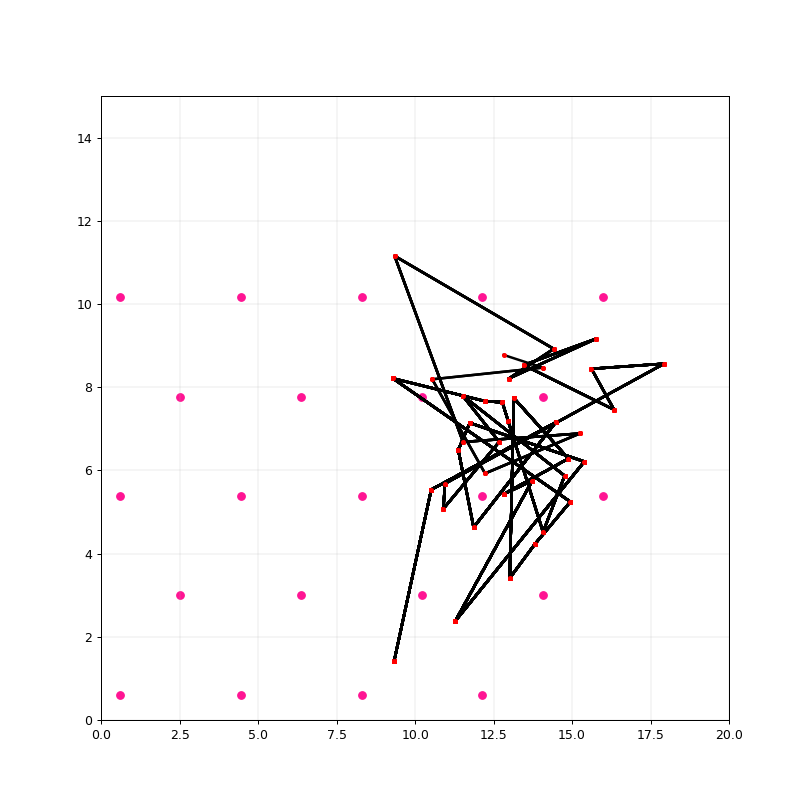

In [6]:
n = 300

m = 1 # коэффициент ускорения
fig = plt.figure(figsize=(9, 9))

def animate(i, x, y, m = 5):
    
    plt.plot(x[:i], y[:i], color='black', lw=2)
    plt.plot(x[:i], y[:i],'ro', ms=3 )
    
    plt.xlim(0, 20)
    plt.ylim(0, 15)
    plt.grid(ls='solid', lw=0.2)
    
anim = animation.FuncAnimation(fig, animate,  fargs=(pointX, pointY, m), frames=int(n/m)*10, interval=200, repeat=False)

plt.scatter(transmitterX, transmitterY, c = 'deeppink')
#plt.scatter(pointX, pointY)


plt.show()